## 1. Importing the required libraries and making some functions ##

In [1]:
# to deal with dataframes and matrices
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# to hide warning messages in plots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# just to center the plots
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [3]:
def make_autopct(values):
    '''
    This function sets the autopct for pie charts as I want to appear
    :param values -> the data which is shown in the pie
    '''
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

In [4]:
def setting_dataframe(df):
    '''
    This function display the results in an organized dataframe form
    :param df -> the dataframe 
    '''
    df = df.style.set_table_styles([{"selector": "td, th", "props": [("border", "1px solid grey !important")]},
                                    {"selector": "th", "props": [('text-align', 'center')]}])
    df = df.set_properties(**{'text-align': 'center'}).hide_index()
    return df

## 2. Reading the dataset ##

In [5]:
netflix_df = pd.read_csv("netflix_titles.csv")

In [6]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
# set the first column as the dataset's index
netflix_df.set_index("show_id", inplace=True)

In [8]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 3. Data Exploration ##

### 3.1. General information about the data ###

In [9]:
# the size of the data
data_size = netflix_df.shape
print("This data has {} entries and {} features(columns).".format(data_size[0], data_size[1]))

This data has 7787 entries and 11 features(columns).


In [10]:
# the features (columns) of this data
primary_key = netflix_df.index.name
columns = netflix_df.columns
print("The primary key or the index of this data is ({}) and its columns are: ".format(primary_key))
for idx, column in enumerate(columns):
    print("{}) {}".format(idx+1, column), end="\n")

The primary key or the index of this data is (show_id) and its columns are: 
1) type
2) title
3) director
4) cast
5) country
6) date_added
7) release_year
8) rating
9) duration
10) listed_in
11) description


In [11]:
# what each column represents
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


From the previous cell I've gained some information:
1. There're some features(columns) which have more than one information such as __cast__ and __listed_in__
2. The __duration__ column has inconsistent data, as some of the entries are about TV Shows and the other are about Movies
3. There're some movies/tv shows which their title seems as integers!
4. The year in __date_added__ may differ from the __release_year__
5. The __rating__ column has different information from what I expected!

Let's explore those titles which have numbers, and those strange ratings

In [12]:
# 1. exploring the titles
netflix_df["title"].tail(10)

show_id
s7778                                Zombie Dumb
s7779                                 Zombieland
s7780                                  Zona Rosa
s7781                                        Zoo
s7782                                       Zoom
s7783                                       Zozo
s7784                                     Zubaan
s7785                          Zulu Man in Japan
s7786                      Zumbo's Just Desserts
s7787    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, dtype: object

It seems that titles are ordered alphabetically, so the entries with numbers as their titles may be real movies/tv shows.
> After some search, I've found that those movies/tv shows exist and those are their real names.

In [13]:
# 2. exploring the ratings
netflix_df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

To understand what those ratings represent, I need Google's help :)
> After some search, I've found that those ratings are not our ratings but They're MPA film ratings.

MPA stands for Motion Picture Associations, their film rating system provides parents with the information needed to determine if a film is appropriate for their children.

Now it's better to change this column's name to avoid any misunderstanding.

In [14]:
netflix_df.rename(columns={"rating": "MPA_rating"}, inplace=True)

<hr>

### <u>Ratings Guide:</u> ###
* __TV-MA__ : Unsuitable for children under 17 (Mature Audience Only).
<br>

* __TV-14__ : Unsuitable for children under 14.
<br>

* __TV-PG__ : Parents or guardians may find inappropriate for younger children.
<br>

* __R__ : Under 17 requires accompanying parent or adult guardian (Restricted).
<br>

* __PG-13__ : Parents strongly cautioned, some material may be inappropriate for children under 13.
<br>

* __TV-Y__ : Programs aimed at a very young audience, including children from ages 2-6.
<br>

* __TV-Y7__ : Programs most appropriate for children age 7 and up.
<br>

* __PG__ : Some material may not be suitable for children (Parental Guidance suggested).
<br>

* __TV-G__ : Programs suitable for all ages; these are not necessarily children's shows.
<br>

* __NR__ : (Not Rated)
<br>

* __G__ : (General Audiences)
<br>

* __TV-Y7-FV__ : Programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category.
<br>

* __UR__ : (Un-rated) (Same as NR)
<br>

* __NC-17__ : No children under 17

<hr>

In [15]:
# let's move to the data types
netflix_df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
MPA_rating      object
duration        object
listed_in       object
description     object
dtype: object

From the previous cell, it seems that there're some columns which have incorrect data types such as __date_added__. They've to be *datetime* (will deal with it in the __Data Cleaning__ phase).

<hr>

### 3.2. Exploring some categorized columns ### 

In [16]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [17]:
netflix_df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In the previous cell, I've found that there're some columns which have more than one information per entry such as __cast__ and __listed_in__. Now, the __country__ column will join them because as shown, there're entries with more than one country.

In [18]:
netflix_df['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

In [19]:
netflix_df['MPA_rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: MPA_rating, dtype: int64

In [20]:
netflix_df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

<hr>

## 4. Data Cleaning ##

### 4.1. Search for duplicated entries ###

In [21]:
duplicateRows = netflix_df[netflix_df.duplicated(["title"])]
duplicateRows

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,


Nice! There's no duplicated entries.

<hr>

### 4.2. Search for nulls ###

In [22]:
netflix_df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
MPA_rating         7
duration           0
listed_in          0
description        0
dtype: int64

It seems that there're some columns with few nulls such as __date_added__ and __rating__, and many columns with MANY nulls such as __director__, __cast__ and __country__.

#### 4.2.1. Let's deal with the columns with few nulls ####

<ul>
    1. Movies/TV Shows ratings
</ul>

In [23]:
# there's 7 non-rating movies, let's show them and try to find their rates
netflix_df[netflix_df["MPA_rating"].isnull()]

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


#### From Netflix and IMDB platforms, I found that the movies' ratings are ####
* 13th: A Conversation with Oprah Winfrey & Ava DuVernay : PG-13
* Gargantia on the Verdurous Planet : TV-14
* Little Lunch : TV-MA
* Louis C.K. 2017 : TV-MA
* Louis C.K.: Hilarious : NR
* Louis C.K.: Live at the Comedy Store : NC-17
* My Honor Was Loyalty : PG-13

In [24]:
# let's assign the ratings
netflix_df.loc[netflix_df['title']=="13TH: A Conversation with Oprah Winfrey & Ava DuVernay", 'MPA_rating'] = "PG-13"
netflix_df.loc[netflix_df['title']=="Gargantia on the Verdurous Planet", 'MPA_rating'] = "TV-14"
netflix_df.loc[netflix_df['title']=="Little Lunch", 'MPA_rating'] = "TV-MA"
netflix_df.loc[netflix_df['title']=="Louis C.K. 2017", 'MPA_rating'] = "TV-MA"
netflix_df.loc[netflix_df['title']=="Louis C.K.: Hilarious", 'MPA_rating'] = "NR"
netflix_df.loc[netflix_df['title']=="Louis C.K.: Live at the Comedy Store", 'MPA_rating'] = "NC-17"
netflix_df.loc[netflix_df['title']=="My Honor Was Loyalty", 'MPA_rating'] = "PG-13"

In [25]:
netflix_df["MPA_rating"].isnull().sum()

0

<ul>
    2. Movies/TV Shows added date
</ul>

In [26]:
# there're 10 movies which their date_added is null
netflix_df[netflix_df['date_added'].isnull()]

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


#### From IMDB, we found their added dates ####
* A Young Doctor's Notebook and Other Stories : Oct 2, 2013
* Anthony Bourdain: Parts Unknown : Apr 14, 2013
* Frasier : Sep 23, 2003
* Friends : Sep 25, 2003
* Gunslinger Girl : Jan 7, 2008
* Kikoriki : Just 2010
* La Familia P. Luche : Jul 8, 2012
* Maron : May 4, 2016
* Red vs. Blue : Apr 1, 2015
* The Adventures of Figaro Pho : Just 2015

In [27]:
# let's assign the ratings
netflix_df.loc[netflix_df['title']=="A Young Doctor's Notebook and Other Stories", 'date_added'] = "October 2, 2013"
netflix_df.loc[netflix_df['title']=="Anthony Bourdain: Parts Unknown", 'date_added'] = "April 14, 2013"
netflix_df.loc[netflix_df['title']=="Frasier", 'date_added'] = "September 23, 2003"
netflix_df.loc[netflix_df['title']=="Friends", 'date_added'] = "September 25, 2003"
netflix_df.loc[netflix_df['title']=="Gunslinger Girl", 'date_added'] = "January 7, 2008"
netflix_df.loc[netflix_df['title']=="Kikoriki", 'date_added'] = "2010"
netflix_df.loc[netflix_df['title']=="La Familia P. Luche", 'date_added'] = "July 8, 2012"
netflix_df.loc[netflix_df['title']=="Maron", 'date_added'] = "May 4, 2016"
netflix_df.loc[netflix_df['title']=="Red vs. Blue", 'date_added'] = "April 1, 2015"
netflix_df.loc[netflix_df['title']=="The Adventures of Figaro Pho", 'date_added'] = "2015"

In [28]:
netflix_df["date_added"].isnull().sum()

0

#### 4.2.2. Let's deal with the columns with many nulls ####

<ul>
    1. country
</ul>

In [29]:
null_countires = netflix_df['country'].isnull().sum()
print("The number of entries which have no country (Null) = {}\
      \nThe percentage between those entries and the total entries is {} %".format(null_countires, round(null_countires/data_size[0]*100, 2)))

The number of entries which have no country (Null) = 507      
The percentage between those entries and the total entries is 6.51 %


In [30]:
# the percentage shows that those entries' number is very small relative to the whole data, so we can rdrop them
netflix_df = netflix_df[netflix_df['country'].notna()]

In [31]:
netflix_df["country"].isnull().sum()

0

<ul>
    2. cast and director
    
    Those columns have so many null values, but I'm not interested in them so I'll not drop their entries.
</ul>

<hr>

### 4.3. Converting some columns to their proper types ### 

In [32]:
# converting date_added to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [33]:
netflix_df.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
MPA_rating              object
duration                object
listed_in               object
description             object
dtype: object

In [34]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<hr>

## 5. Data Analysis  and Visualization ##

### 5.1. TV shows vs. Movies ###

In [35]:
tv_vs_movies = netflix_df['type'].value_counts()
tv_vs_movies

Movie      5147
TV Show    2133
Name: type, dtype: int64

In [36]:
tv_vs_movies = tv_vs_movies.to_list()

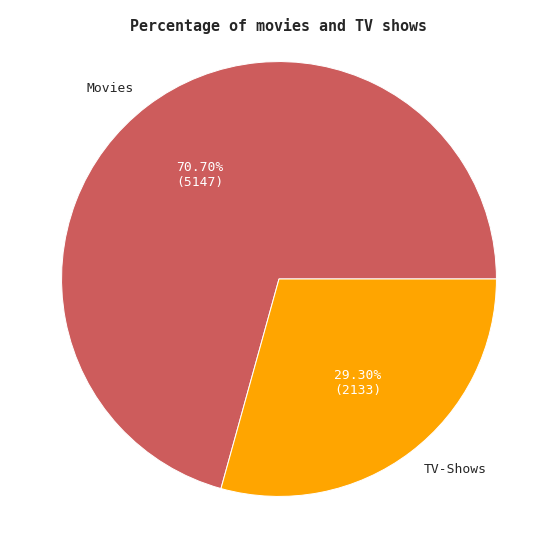

In [37]:
figure = plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(tv_vs_movies,
                          labels=['Movies', 'TV-Shows'],
                          autopct=make_autopct(tv_vs_movies), colors=["indianred", "orange"],
                          textprops={"fontsize":13, "fontname": "monospace"},
                          wedgeprops = {"edgecolor" : "white", 'linewidth': 1, 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('white')
plt.title("Percentage of movies and TV shows", fontsize=15, fontweight="bold", fontname="monospace",  y=0.945)
plt.show()

<hr>

### 5.2. The growth of content creation over the years ###

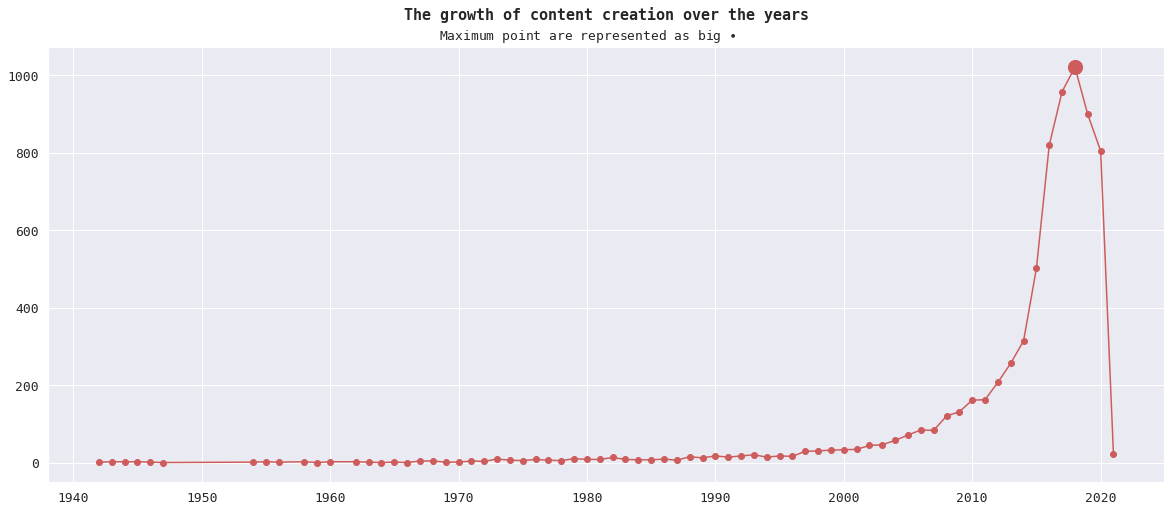

In [38]:
number_of_contents = netflix_df.groupby('release_year').size().to_list()
years = np.sort(netflix_df['release_year'].unique())
max_number_of_contents = max(number_of_contents)
index = number_of_contents.index(max(number_of_contents))
 
figure = plt.figure(figsize=(20, 8))
plt.plot(years, number_of_contents, color="indianred", marker='o', markersize=6)
plt.scatter(years[index], max_number_of_contents, s=200, color="indianred", marker='o')

plt.title("The growth of content creation over the years", fontsize=15, fontweight="bold", fontname="monospace", y=1.05)
plt.suptitle("Maximum point are represented as big {}".format(r'$\bullet$'),
             fontsize=13,fontname="monospace", y=0.915)
plt.xticks(fontsize=13, fontname="monospace")
plt.yticks(fontsize=13, fontname="monospace")
plt.show()

The viz shows that the year with the highest number of content is 2018 which means that the data may be not complete.

<hr>

### 5.3. Monitor content creations along the months ###

In [39]:
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df['date_added']).month

In [40]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description,month_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1


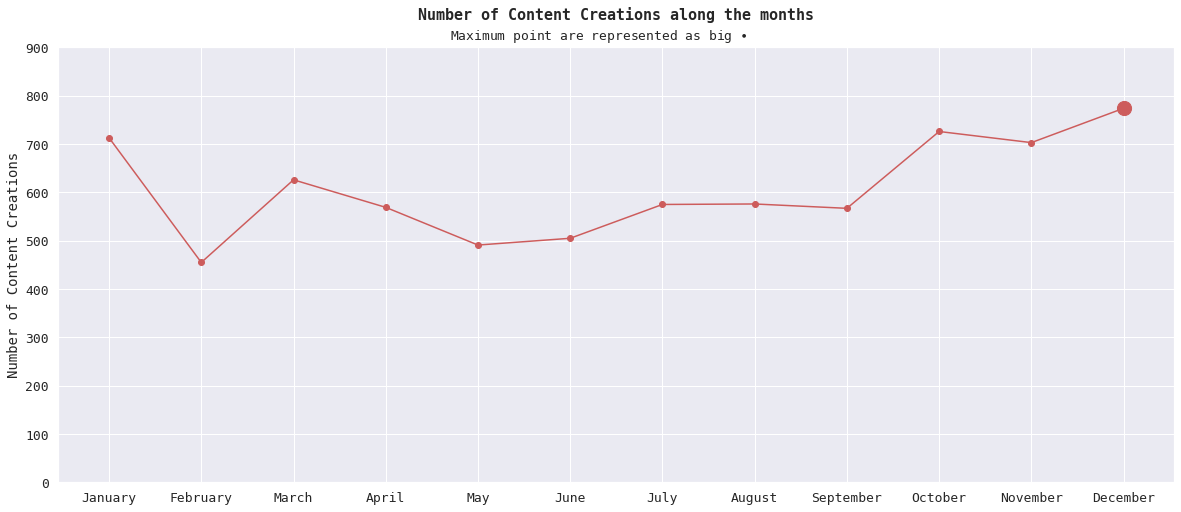

In [41]:
number_of_contents = netflix_df.groupby('month_added').size().to_list()
months_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

max_number_of_contents = max(number_of_contents)
index = number_of_contents.index(max(number_of_contents))

figure = plt.figure(figsize=(20, 8))
plt.plot(months_names, number_of_contents, color="indianred", marker='o', markersize=6)
plt.scatter(months_names[index], max_number_of_contents, s=200, color="indianred", marker='o')

plt.title("Number of Content Creations along the months", fontsize=15, fontweight="bold", fontname="monospace", y=1.05)
plt.suptitle("Maximum point are represented as big {}".format(r'$\bullet$'),
             fontsize=13,fontname="monospace", y=0.915)
plt.ylabel("Number of Content Creations", fontsize=14, fontname="monospace")
plt.xticks(fontsize=13, fontname="monospace")
plt.yticks(fontsize=13, fontname="monospace")
plt.ylim([0, 900])
plt.show()

<hr>

### 5.4. The oldest 10 tv series and movies ###

In [42]:
# the oldest 10 tv series
oldest_tv_series = netflix_df[netflix_df['type']=="TV Show"][['title','release_year']].sort_values(by="release_year").head(10)
setting_dataframe(oldest_tv_series.reset_index())

show_id,title,release_year
s4867,Pioneers of African-American Cinema,1946
s6954,The Twilight Zone (Original Series),1963
s6083,The Andy Griffith Show,1967
s5786,Star Trek,1968
s4217,Monty Python's Fliegender Zirkus,1972
s4218,Monty Python's Flying Circus,1974
s1578,Dad's Army,1977
s1950,El Chavo,1979
s4479,Ninja Hattori,1981
s5239,Robotech,1985


In [43]:
# the oldest 10 movies
oldest_movies = netflix_df[netflix_df['type']=="Movie"][['title','release_year']].sort_values(by="release_year").head(10)
setting_dataframe(oldest_movies.reset_index())

show_id,title,release_year
s6118,The Battle of Midway,1942
s4961,Prelude to War,1942
s7680,WWII: Report from the Aleutians,1943
s7617,Why We Fight: The Battle of Russia,1943
s7343,Undercover: How to Operate Behind Enemy Lines,1943
s6658,The Memphis Belle: A Story of a Flying Fortress,1944
s7269,Tunisian Victory,1944
s6700,The Negro Soldier,1944
s4437,Nazi Concentration Camps,1945
s3426,Know Your Enemy - Japan,1945


<hr>

### 5.5. The highest 10 countries contributed in content creation ###

As we see, many movies or TV shows were filmed in many countries, and we want to take into count all the countires. So, we need to get in every movies/TV show and see the countries where they were filmed.

In [44]:
def count_countires(countries_df):
    '''
    This function just counts the number of countries appears in each entry and returns the dictionary which contains this information
    :param countries_df -> the dataframe which I need to count the countries appear in it
    '''
    countries_dict = dict()
    for country_entry in countries_df:
        countries_list = country_entry.split(', ')
        for country in countries_list:
            if country in countries_dict.keys():
                countries_dict[country] += 1
            else:
                countries_dict[country] = 1
    return countries_dict

In [45]:
movies_countries = netflix_df[netflix_df["type"]=="Movie"]["country"]
shows_countries = netflix_df[netflix_df["type"]=="TV Show"]["country"]

movies_dict = count_countires(movies_countries)
shows_dict = count_countires(shows_countries)

# to see the results in a dataframe
movies = pd.DataFrame(movies_dict.items(), columns=["Country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)

shows = pd.DataFrame(shows_dict.items(), columns=["Country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)

In [46]:
display(setting_dataframe(movies))

Country,Frequency
United States,2430
India,915
United Kingdom,466
Canada,286
France,265
Spain,158
Germany,157
Japan,103
China,102
Mexico,101


In [47]:
display(setting_dataframe(shows))

Country,Frequency
United States,866
United Kingdom,256
Japan,184
South Korea,157
Canada,126
France,84
India,75
Taiwan,70
Australia,60
Spain,57


In [48]:
# as we see, the order is not the same in both movies and tv shows dataframes.
# to solve this and get more consistent resuts I merge the 2 dataframes

all_contents = movies.merge(shows, how="outer", on="Country").head(10)
all_contents.rename(columns={"Frequency_x": "Number of Movies", "Frequency_y": "Number of TV Shows"}, inplace=True)
all_contents = all_contents.astype({"Number of Movies":'int64', "Number of TV Shows":'int64'})
display(setting_dataframe(all_contents))

Country,Number of Movies,Number of TV Shows
United States,2430,866
India,915,75
United Kingdom,466,256
Canada,286,126
France,265,84
Spain,158,57
Germany,157,42
Japan,103,184
China,102,45
Mexico,101,53


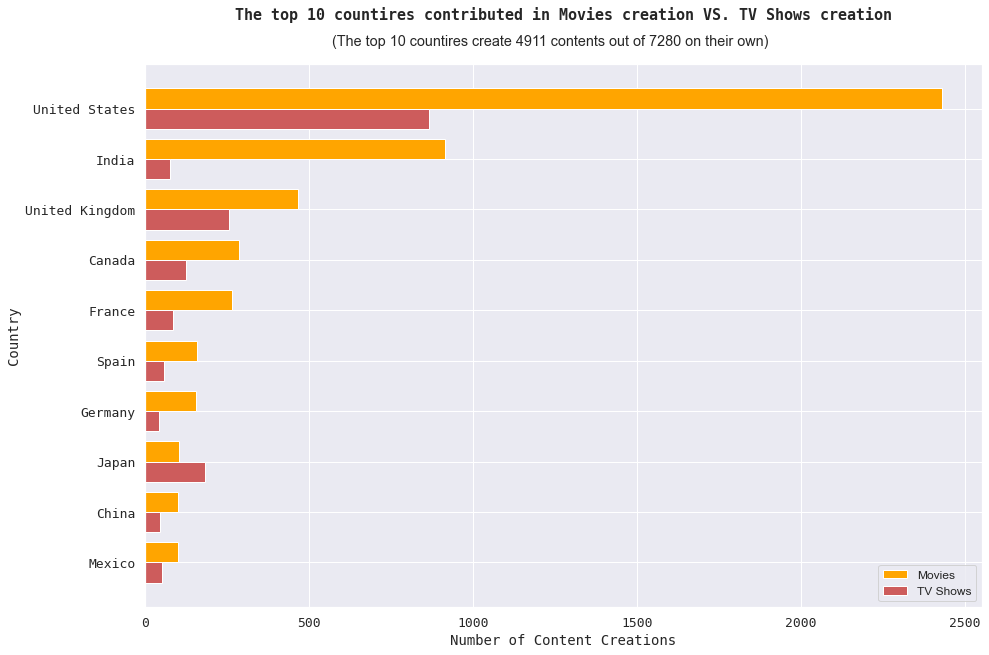

In [49]:
num_of_movies = all_contents["Number of Movies"]
num_of_shows = all_contents["Number of TV Shows"]

ind = np.arange(len(num_of_movies))
width = 0.4

figure = plt.figure(figsize=(15,10))

plt.barh(ind, num_of_movies, width, color="orange", label="Movies")
plt.barh(ind + width, num_of_shows, width, color="indianred", label="TV Shows")

plt.title("The top 10 countires contributed in Movies creation VS. TV Shows creation", fontname="monospace", fontsize=15, fontweight="bold", y=1.07)
plt.suptitle("(The top 10 countires create {} contents out of {} on their own)"
             .format(sum(netflix_df.groupby('country').size().sort_values(ascending=False)[:10]), netflix_df.shape[0]), y=0.92)
plt.ylabel("Country", fontsize=14, fontname="monospace")
plt.xlabel("Number of Content Creations", fontsize=14, fontname="monospace")
plt.yticks(ind + 0.2, labels=all_contents["Country"], fontsize=13, fontname="monospace")
plt.xticks(fontsize=13, fontname="monospace")
plt.gca().invert_yaxis()
plt.legend(fontsize="medium")
plt.show()

<hr>

### 5.6. The most frequent categories ###

Also here, many movies or TV shows are categorized in different categories at the same time, and we want to take into count all the categories. So, we need to get in every movies/TV show and see its categories.

In [50]:
categories_df = netflix_df.loc[netflix_df['listed_in'].notnull()]['listed_in']

categories_dict = dict()
for category_entry in categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in categories_dict.keys():
            categories_dict[category] += 1
        else:
            categories_dict[category] = 1
            
# to see the results in a dataframe
results = pd.DataFrame(categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
display(setting_dataframe(results.head(10)))

Category,Frequency
International Movies,2342
Dramas,2062
Comedies,1429
International TV Shows,1043
Documentaries,742
Action & Adventure,706
Independent Movies,670
TV Dramas,623
Romantic Movies,521
Thrillers,480


As we see, movies have their own categories which are different from the categories of TV shows.
For example: Movies have "International Movies and Dramasa" and TV Shows have "International TV Shows and TV Dramas"
So, it's better to show them separately.

In [51]:
movies_categories_df = netflix_df[netflix_df.loc[netflix_df['listed_in'].notnull()]["type"]=="Movie"]['listed_in']

movies_categories_dict = dict()
for category_entry in movies_categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in movies_categories_dict.keys():
            movies_categories_dict[category] += 1
        else:
            movies_categories_dict[category] = 1
            
# to see the results in a dataframe
movies = pd.DataFrame(movies_categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
display(setting_dataframe(movies.head(10)))

Category,Frequency
International Movies,2342
Dramas,2062
Comedies,1429
Documentaries,742
Action & Adventure,706
Independent Movies,670
Romantic Movies,521
Thrillers,480
Children & Family Movies,479
Horror Movies,306


In [52]:
shows_categories_df = netflix_df[netflix_df.loc[netflix_df['listed_in'].notnull()]["type"]=="TV Show"]['listed_in']

shows_categories_dict = dict()
for category_entry in shows_categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in shows_categories_dict.keys():
            shows_categories_dict[category] += 1
        else:
            shows_categories_dict[category] = 1
            
# to see the results in a dataframe
shows = pd.DataFrame(shows_categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
display(setting_dataframe(shows.head(10)))

Category,Frequency
International TV Shows,1043
TV Dramas,623
TV Comedies,470
Crime TV Shows,396
Kids' TV,344
Docuseries,314
Romantic TV Shows,281
British TV Shows,220
Reality TV,189
TV Action & Adventure,141


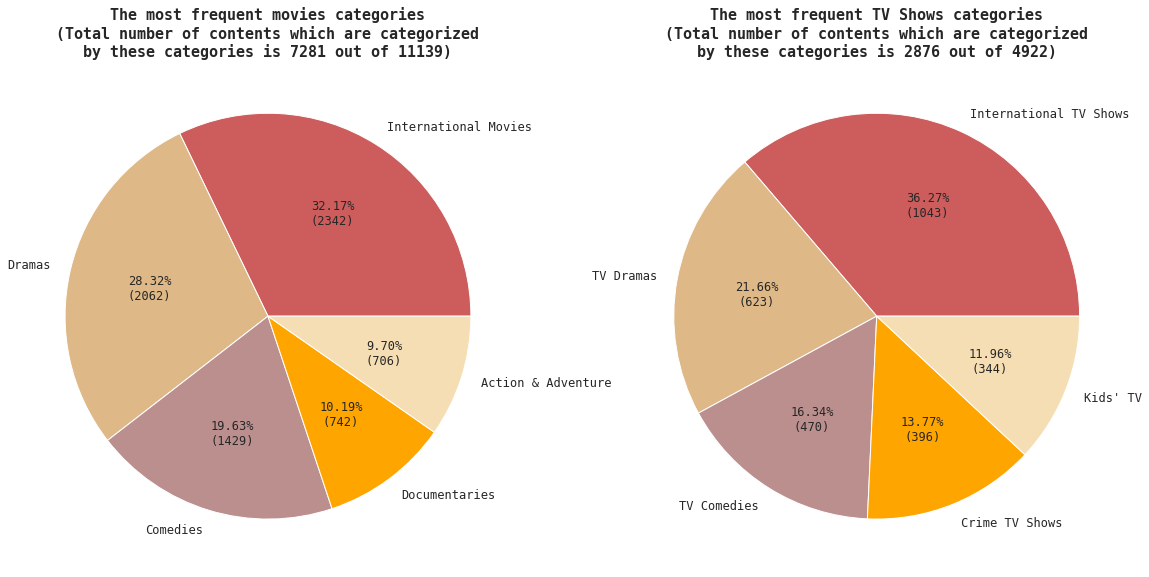

In [53]:
figure = plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)

top_ten_movies_categories = movies.head(5)

colors = ["indianred", "burlywood", "rosybrown", "orange", "wheat"]
plt.pie(top_ten_movies_categories["Frequency"], labels=top_ten_movies_categories["Category"],
        colors=colors,
        autopct = make_autopct(top_ten_movies_categories['Frequency']),
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,
                      'antialiased': True},
        textprops={"fontname": 'monospace',
                  "fontsize": 12})
plt.title("The most frequent movies categories\n(Total number of contents which are categorized\nby these categories is {} out of {})"
             .format(sum(top_ten_movies_categories["Frequency"]), movies["Frequency"].sum()),
          fontname = "monospace", fontsize = 15, fontweight = "bold")
plt.subplot(1, 2, 2)

top_ten_shows_categories = shows.head(5)

colors = ["indianred", "burlywood", "rosybrown", "orange", "wheat"]
plt.pie(top_ten_shows_categories["Frequency"], labels=top_ten_shows_categories["Category"],
        colors=colors,
        autopct = make_autopct(top_ten_shows_categories['Frequency']),
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,
                      'antialiased': True},
        textprops={"fontname": 'monospace',
                  "fontsize": 12})
plt.title("The most frequent TV Shows categories\n(Total number of contents which are categorized\nby these categories is {} out of {})"
             .format(sum(top_ten_shows_categories["Frequency"]), shows["Frequency"].sum())
          , fontname = "monospace", fontsize = 15, fontweight = "bold")
plt.ylabel("")
plt.show()

<hr>

### 5.7. Number of movies and tv shows by MPA rating ###

In [54]:
netflix_df["MPA_rating"].value_counts().sort_values(ascending=True)[:10]

NC-17         4
TV-Y7-FV      5
UR            5
G            39
NR           85
TV-G        177
TV-Y        210
TV-Y7       221
PG          244
PG-13       384
Name: MPA_rating, dtype: int64

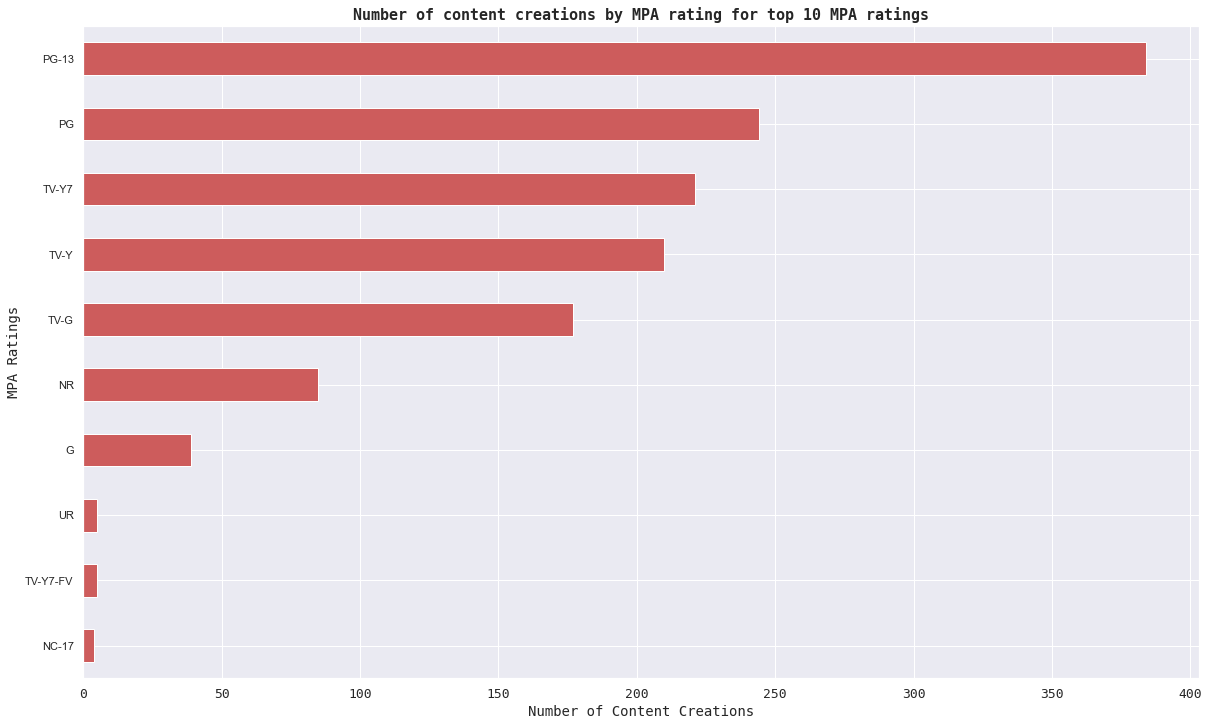

In [55]:
figure = plt.figure(figsize=(20, 12))
netflix_df["MPA_rating"].value_counts().sort_values()[:10].plot(kind="barh", color="indianred")
plt.title("Number of content creations by MPA rating for top 10 MPA ratings", fontname="monospace", fontsize=15, fontweight="bold")
plt.xlabel("Number of Content Creations", fontsize=14, fontname="monospace")
plt.ylabel("MPA Ratings", fontsize=14, fontname="monospace")
plt.xticks(fontsize=13, fontname="monospace")
plt.show()

<hr>

### 5.8. My favourite movie/tv-show ###

In [56]:
fav_tv_show = "Friends"
setting_dataframe(netflix_df[netflix_df['title']==fav_tv_show])

type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description,month_added
TV Show,Friends,nan,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, Matt LeBlanc, Matthew Perry, David Schwimmer",United States,2003-09-25 00:00:00,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies","This hit sitcom follows the merry misadventures of six 20-something pals as they navigate the pitfalls of work, life and love in 1990s Manhattan.",9


- - - -